# Student Performace Indicator

### Life cyle of Machine Learning Project

- Understaing the Problem statement
- Data collection
- Data checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model

### 1) Problem statement

This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test Preparation course.

### 2) Data Collection

- Data source - https://raw.githubusercontent.com/krishnaik06/mlproject/main/notebook/data/stud.csv
- The data consists of 8 columns and 1000 rows

### 2.1) Import data and Required packages

- Numpy 
- Pandas 
- Matplotlib
- Seaborn and
- Warnings

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


### Import the dataset

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/krishnaik06/mlproject/main/notebook/data/stud.csv")
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
df.shape

(1000, 8)

### 2.2) Dataset information

- gender: sex of students -> (male/female)
- race/ethnicity: ethnicity of students -> (Group A, B, C, D)
- parental_level_of_education: parent's final eduction -> (Bachelor's degree, Master's degree, some college, high school, associate's degree)
- lunch: having lunch before test -> (standard, free/reduced)
- test_preparation_course: complete or not -> (completed,none)
- math_score
- reading_score
- writing_score

### 3. Data checks to perfrom

- Check Missing values
- Check Duplicate 
- Check data type
- Check the no of unique value of each column
- Check statistics of dataset
- Check various categories present in the different categorical column

In [4]:
# check missing value

df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

There are no missing values in the dataset

In [5]:
# check duplicates
df.duplicated().sum()

0

There are no duplicate in the dataset

In [6]:
# check null and object
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [7]:
# check unique values each colums
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [8]:
# check statistics 
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


### Insight

- From above description of numerical data, all means are very close to each other -> b/w  66 to 68.05.
- All standard deviation are also close -> b/w 14.6 to 15.19.
- While there is a minimum score o for math, for writing minimum is much heigher = 10 and for reading much higher = 17

### Exploring Data

In [9]:
print("Categories in 'gender' unique values:    ", end=" ")
print(df['gender'].unique())

print("Categories in 'race/ethnicity' unique values:  ", end=" ")
print(df['race_ethnicity'].unique())

print("Categories in 'parental level of education' unique values:  ", end=" ")
print(df['parental_level_of_education'].unique())

print("Categories in 'lunch' unique values:  ", end=" ")
print(df['lunch'].unique())

print("Categories in 'test preparation course' unique values:  ", end=" ")
print(df['test_preparation_course'].unique())


Categories in 'gender' unique values:     ['female' 'male']
Categories in 'race/ethnicity' unique values:   ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental level of education' unique values:   ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' unique values:   ['standard' 'free/reduced']
Categories in 'test preparation course' unique values:   ['none' 'completed']


In [10]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 3 numerical features : ['math_score', 'reading_score', 'writing_score']

We have 5 categorical features : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


### Adding columns for "total score" and "Average"

In [11]:
df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average'] = df['total_score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [12]:
reading_full = df[df['reading_score'] == 100]['average'].count()
writing_full = df[df['writing_score'] == 100]['average'].count()
math_full = df[df['math_score'] == 100]['average'].count()

print(f'Number of students with full marks in Maths: {math_full}')
print(f'Number of students with full marks in Writing: {writing_full}')
print(f'Number of students with full marks in Reading: {reading_full}')

Number of students with full marks in Maths: 7
Number of students with full marks in Writing: 14
Number of students with full marks in Reading: 17


In [13]:
reading_less_20 = df[df['reading_score'] <= 20]['average'].count()
writing_less_20 = df[df['writing_score'] <= 20]['average'].count()
math_less_20 = df[df['math_score'] <= 20]['average'].count()

print(f'Number of students with less than 20 marks in Maths: {math_less_20}')
print(f'Number of students with less than 20 marks in Writing: {writing_less_20}')
print(f'Number of students with less than 20 marks in Reading: {reading_less_20}')

Number of students with less than 20 marks in Maths: 4
Number of students with less than 20 marks in Writing: 3
Number of students with less than 20 marks in Reading: 1


#### Insights

- From above values we get students have performed the worst in Maths
- Best performance is in reading section

## 4. Exploring Data ( Visualization )
#### 4.1 Visualize average score distribution to make some conclusion.
- Histogram
- Kernel Distribution Function (KDE)

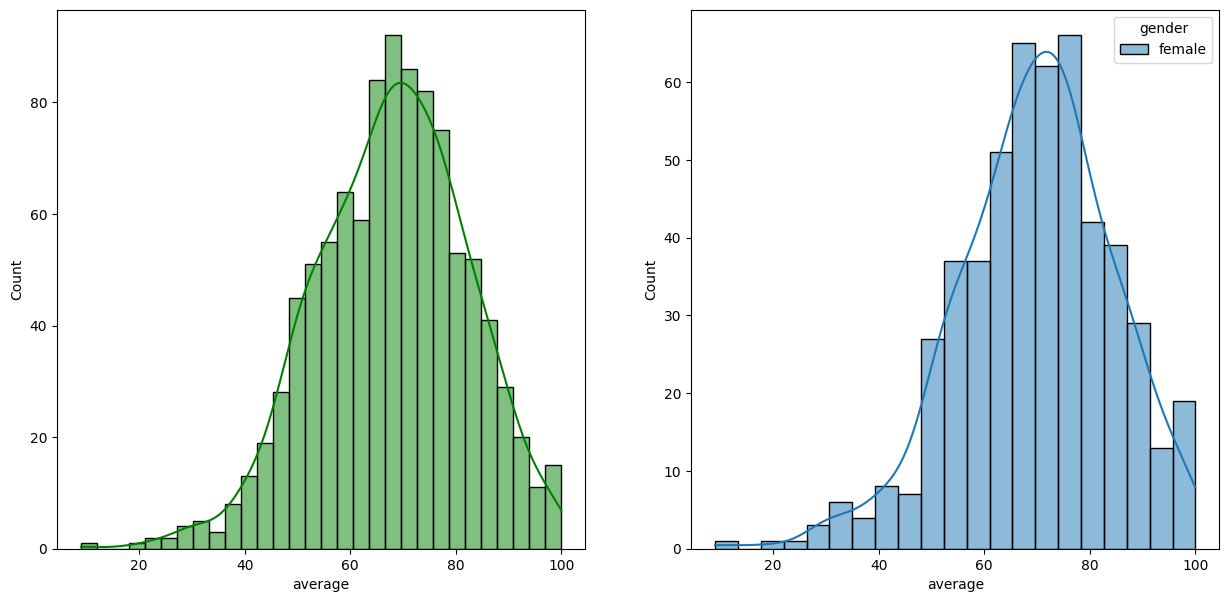

In [14]:
# Histogram 
fig, ax = plt.subplots(1, 2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df, x='average', bins=30, kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df[df.gender == 'female'], x='average', kde=True, hue='gender')
plt.show()

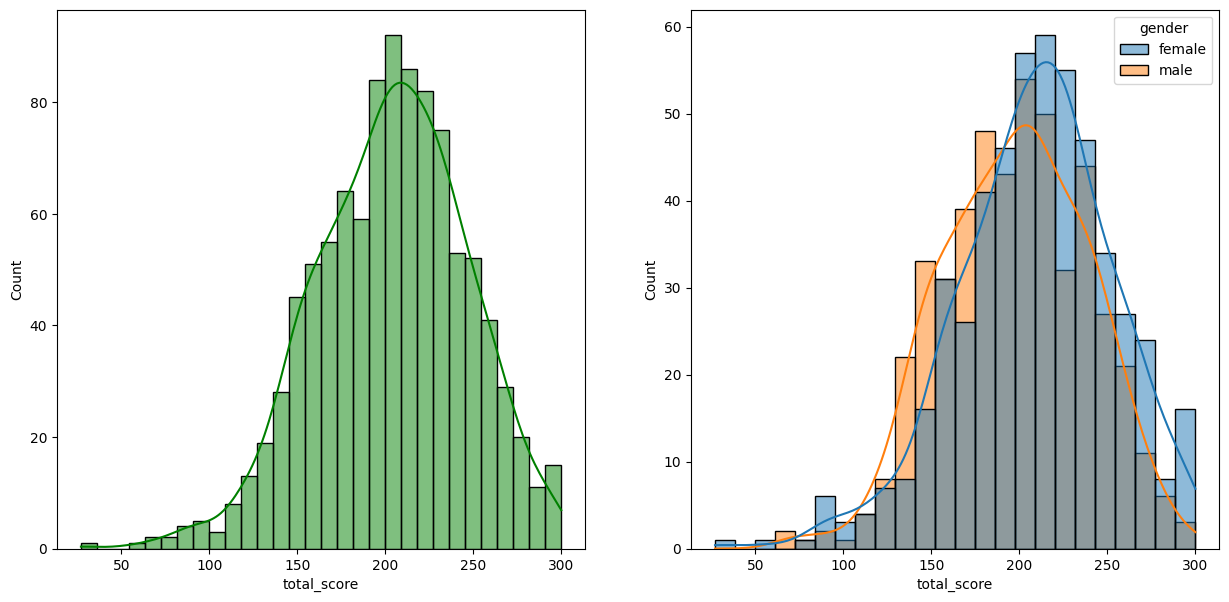

In [15]:
# Histogram
fig, ax = plt.subplots(1, 2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df, x='total_score', bins=30, kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df, x='total_score', kde=True, hue='gender')
plt.show()

**Insights**
- Female students tend to perform well then male students.

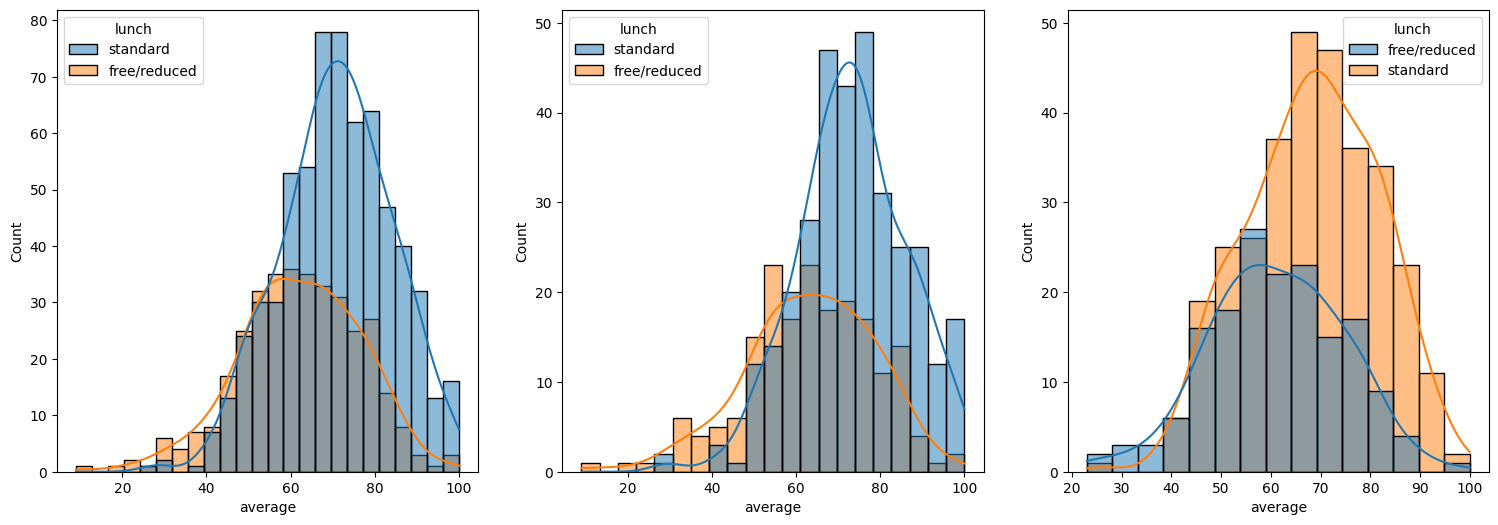

In [16]:
# Higstogram
plt.subplots(1, 3, figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df, x='average', kde=True, hue="lunch")
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'], x='average', kde=True, hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'], x='average', kde=True, hue='lunch')
plt.show()

**Insights**
- Standard lunch helps perform well in exams.
- Standard lunch helps perform well in exams be it a male or a female.

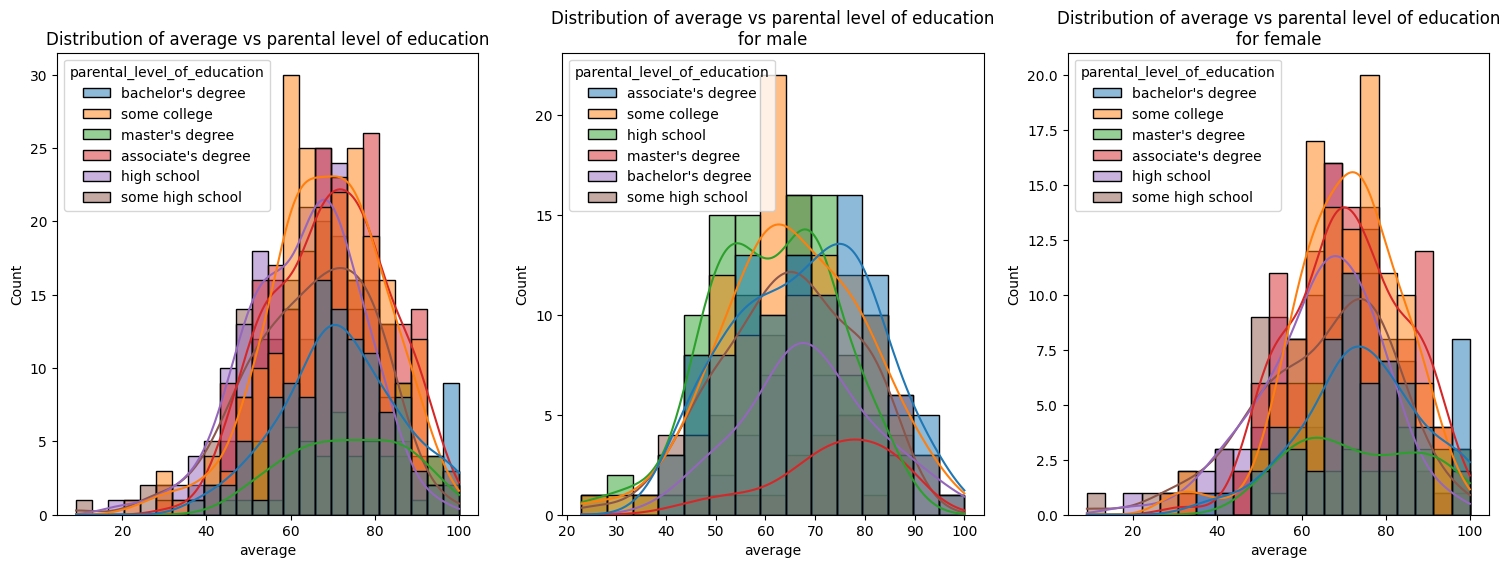

In [17]:
plt.subplots(1,3, figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df, x='average', kde=True, hue=df.parental_level_of_education)
plt.title("Distribution of average vs parental level of education")
plt.subplot(142)
sns.histplot(data=df[df.gender=='male'], x='average', kde=True, hue="parental_level_of_education")
plt.title("Distribution of average vs parental level of education\nfor male")
plt.subplot(143)
sns.histplot(data=df[df.gender=='female'], x='average', kde=True, hue='parental_level_of_education')
plt.title("Distribution of average vs parental level of education\nfor female")
plt.show()

**Insights**
- In general parent's education don't help student perform well in exam.
- 2nd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam
- 3rd plot we can see there is no effect of parent's education on female students.

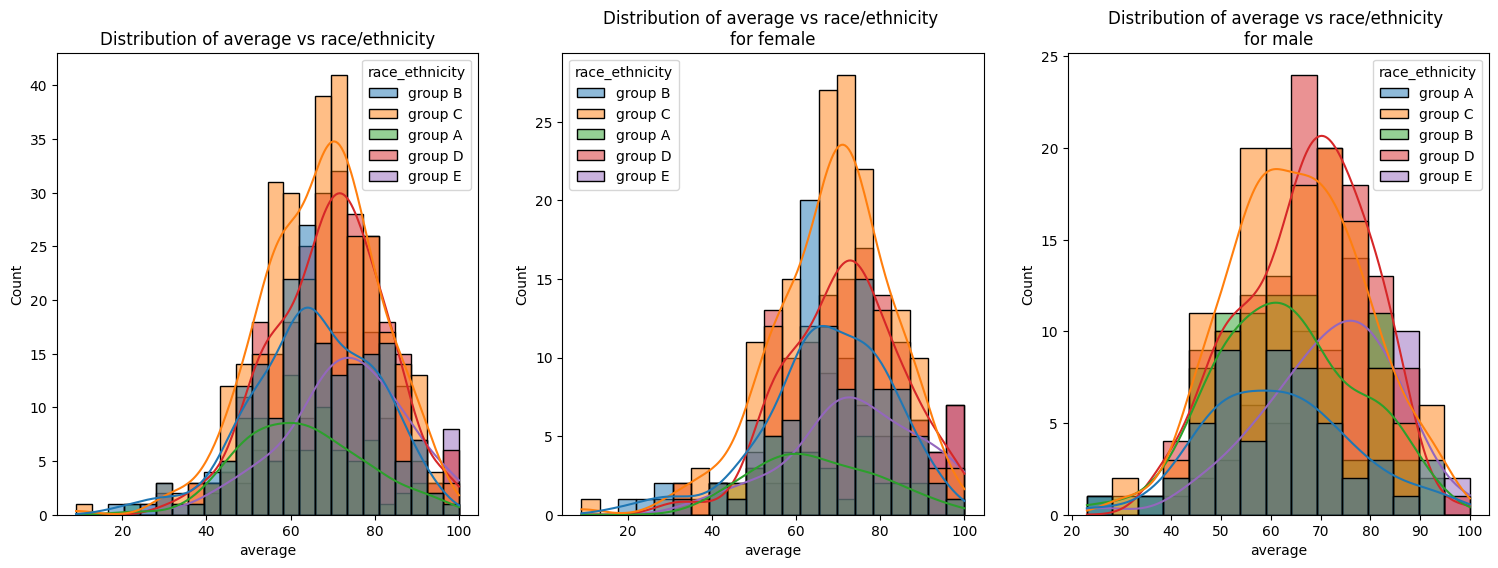

In [18]:
# Distribution of average vs race/ethnicity
plt.subplots(1, 3, figsize=(25, 6))
plt.subplot(141)
ax = sns.histplot(data=df, x='average', kde=True, hue='race_ethnicity')
plt.title("Distribution of average vs race/ethnicity")
plt.subplot(142)
ax = sns.histplot(data=df[df.gender=='female'], x='average', kde=True, hue='race_ethnicity')
plt.title("Distribution of average vs race/ethnicity \nfor female")
plt.subplot(143)
ax = sns.histplot(data=df[df.gender=='male'], x='average', kde=True, hue='race_ethnicity')
plt.title("Distribution of average vs race/ethnicity \nfor male")
plt.show()

**Insights**
- Students of group A and group B tends to perform poorly in exam.
- Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female

#### Maximum score of students in all three subjects

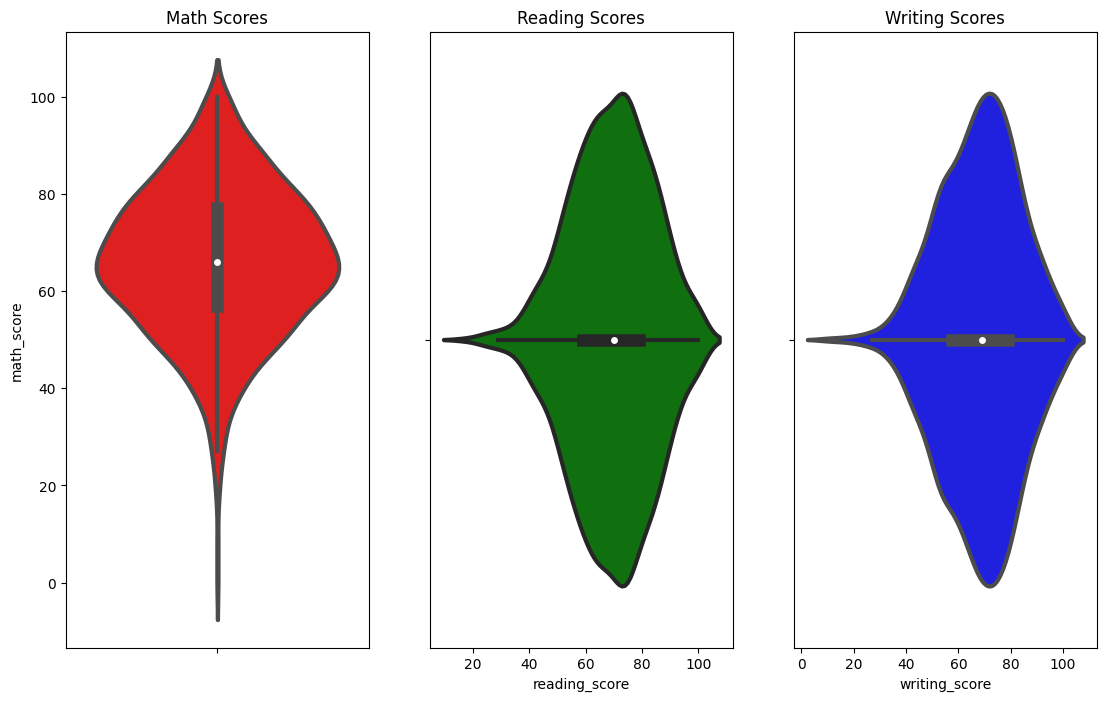

In [19]:
plt.figure(figsize=(18,8))
plt.subplot(1,4,1)
plt.title('Math Scores')
sns.violinplot(data= df,y='math_score', color='red', linewidth=3)
plt.subplot(1,4,2)
plt.title('Reading Scores')
sns.violinplot(data=df,x='reading_score', color='green', linewidth=3)
plt.subplot(1,4,3)
plt.title('Writing Scores')
sns.violinplot(data=df, x='writing_score', color='blue', linewidth=3)
plt.show()


**Insights**
- From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80

#### Multivariate analysis using pieplot

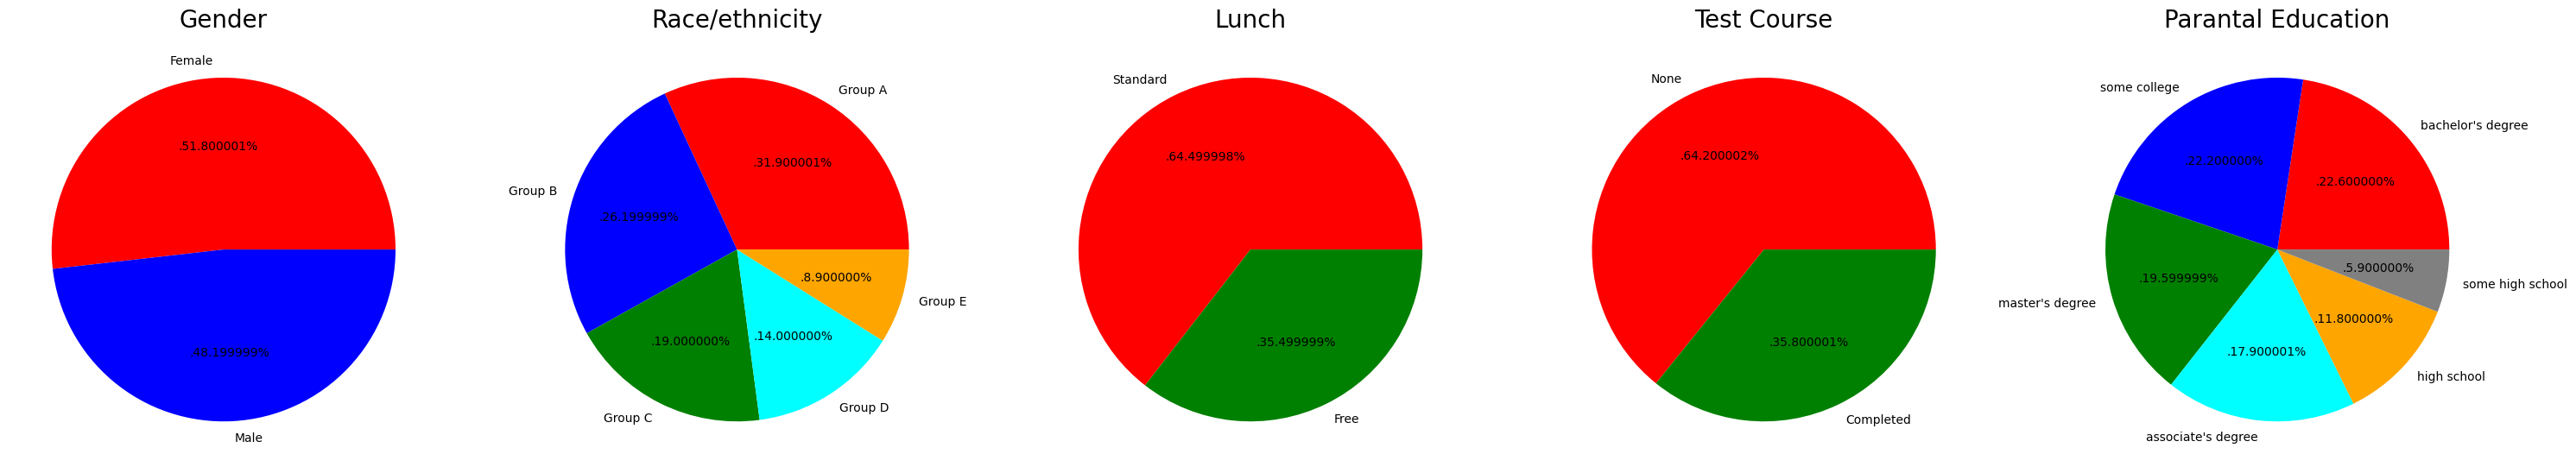

In [20]:
plt.rcParams['figure.figsize']=(30,12)

plt.subplot(1,5,1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red', 'blue']

plt.pie(size, colors=color, labels = labels, autopct='.%2f%%')
plt.title("Gender", fontsize=20)
plt.axis('off')

plt.subplot(1,5,2)
size = df['race_ethnicity'].value_counts()
labels = 'Group A', "Group B", 'Group C', 'Group D', 'Group E'
color = ['red', 'blue','green', 'cyan', 'orange']

plt.pie(size, colors=color, labels = labels, autopct='.%2f%%')
plt.title('Race/ethnicity', fontsize=20)
plt.axis('off')

plt.subplot(1,5,3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red', 'green']

plt.pie(size, colors=color, labels = labels, autopct='.%2f%%')
plt.title('Lunch', fontsize=20)
plt.axis('off')

plt.subplot(1,5,4)
size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red', 'green']

plt.pie(size, colors=color, labels = labels, autopct='.%2f%%')
plt.title('Test Course', fontsize=20)
plt.axis('off')

plt.subplot(1,5,5)
size = df['parental_level_of_education'].value_counts()
labels = "bachelor's degree", 'some college', "master's degree", "associate's degree",'high school', 'some high school'
color = ['red', 'blue','green', 'cyan', 'orange', 'gray']

plt.pie(size, colors=color, labels = labels, autopct='.%2f%%')
plt.title('Parantal Education', fontsize=20)
plt.axis('off')

plt.tight_layout()
plt.grid()
plt.show()

**Insights**
- Number of Male and Female students is almost equal
- Number students are greatest in Group C
- Number of students who have standard lunch are greater
- Number of students who have not enrolled in any test preparation course is greater
- Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"

#### Feature Wise Visualization
##### GENDER COLUMN
- How is distribution of Gender ?
- Is gender has any impact on student's performance ?



##### How is distribution of Gender? -- Univariate Analysis

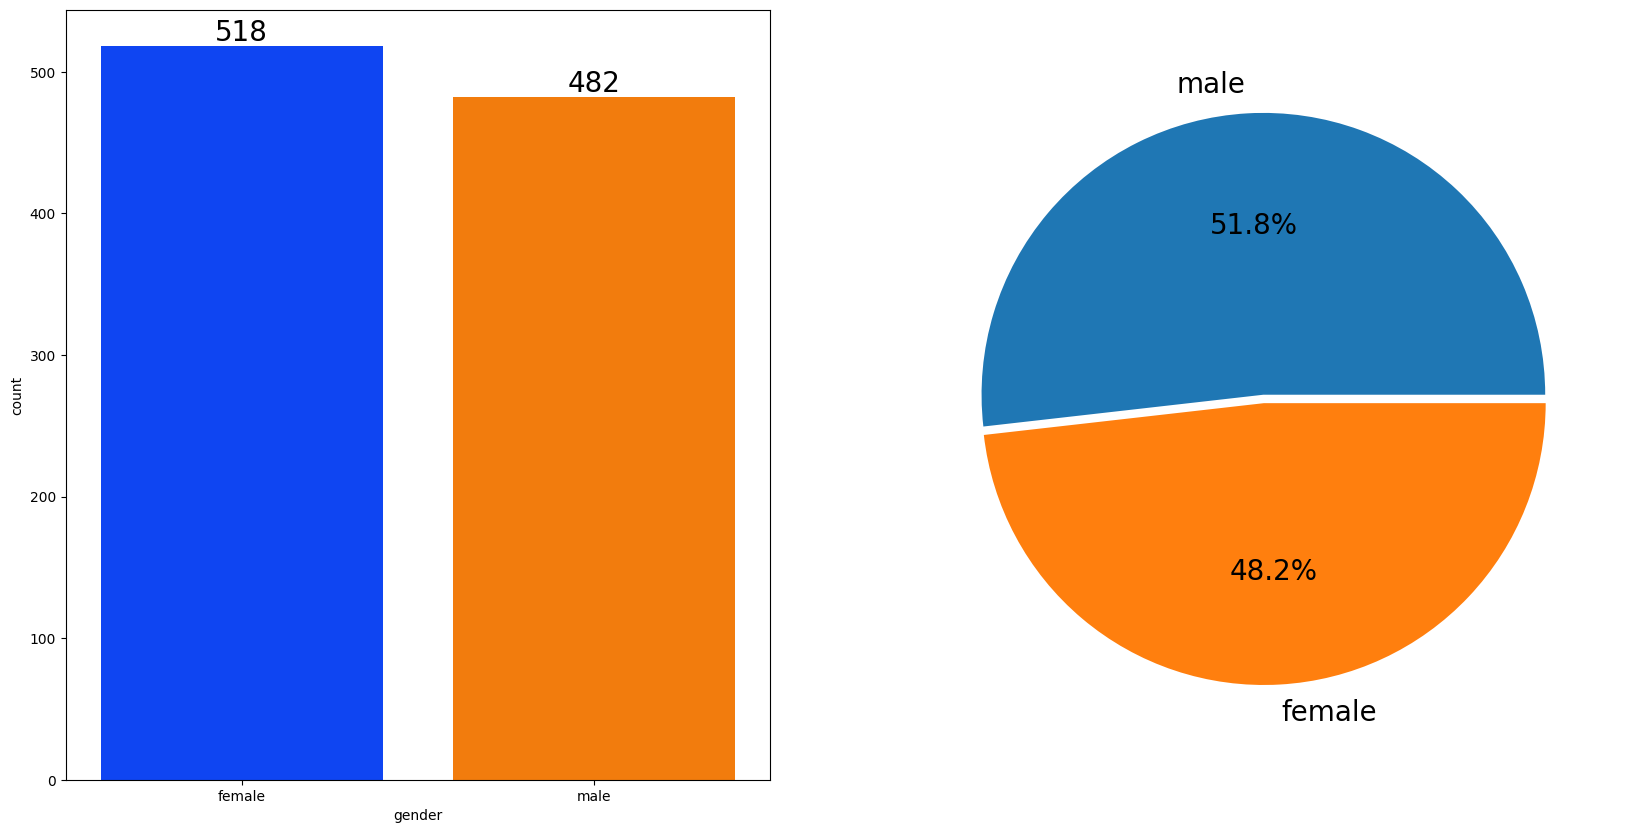

In [21]:

fig, ax = plt.subplots(1,2, figsize=(20, 10))
sns.countplot(data=df, x=df.gender,ax=ax[0], palette='bright', saturation=0.9)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', fontsize=20)

plt.pie(x=df.gender.value_counts(), labels=['male', 'female'], explode=[0,0.03], textprops={'fontsize':20, 'color':'black'}, autopct='%1.1f%%')
plt.show()

**Insights**
- Gender has balanced data with female students are 518 (48.2%) and male students are 482 (51.8%)

##### Bivariate Analysis (Is gender has any impact on student's performance?)

In [22]:
gender_group = df.groupby('gender').mean(numeric_only=True)
gender_group

,math_score,reading_score,writing_score,total_score,average
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


<Figure size 1000x800 with 0 Axes>

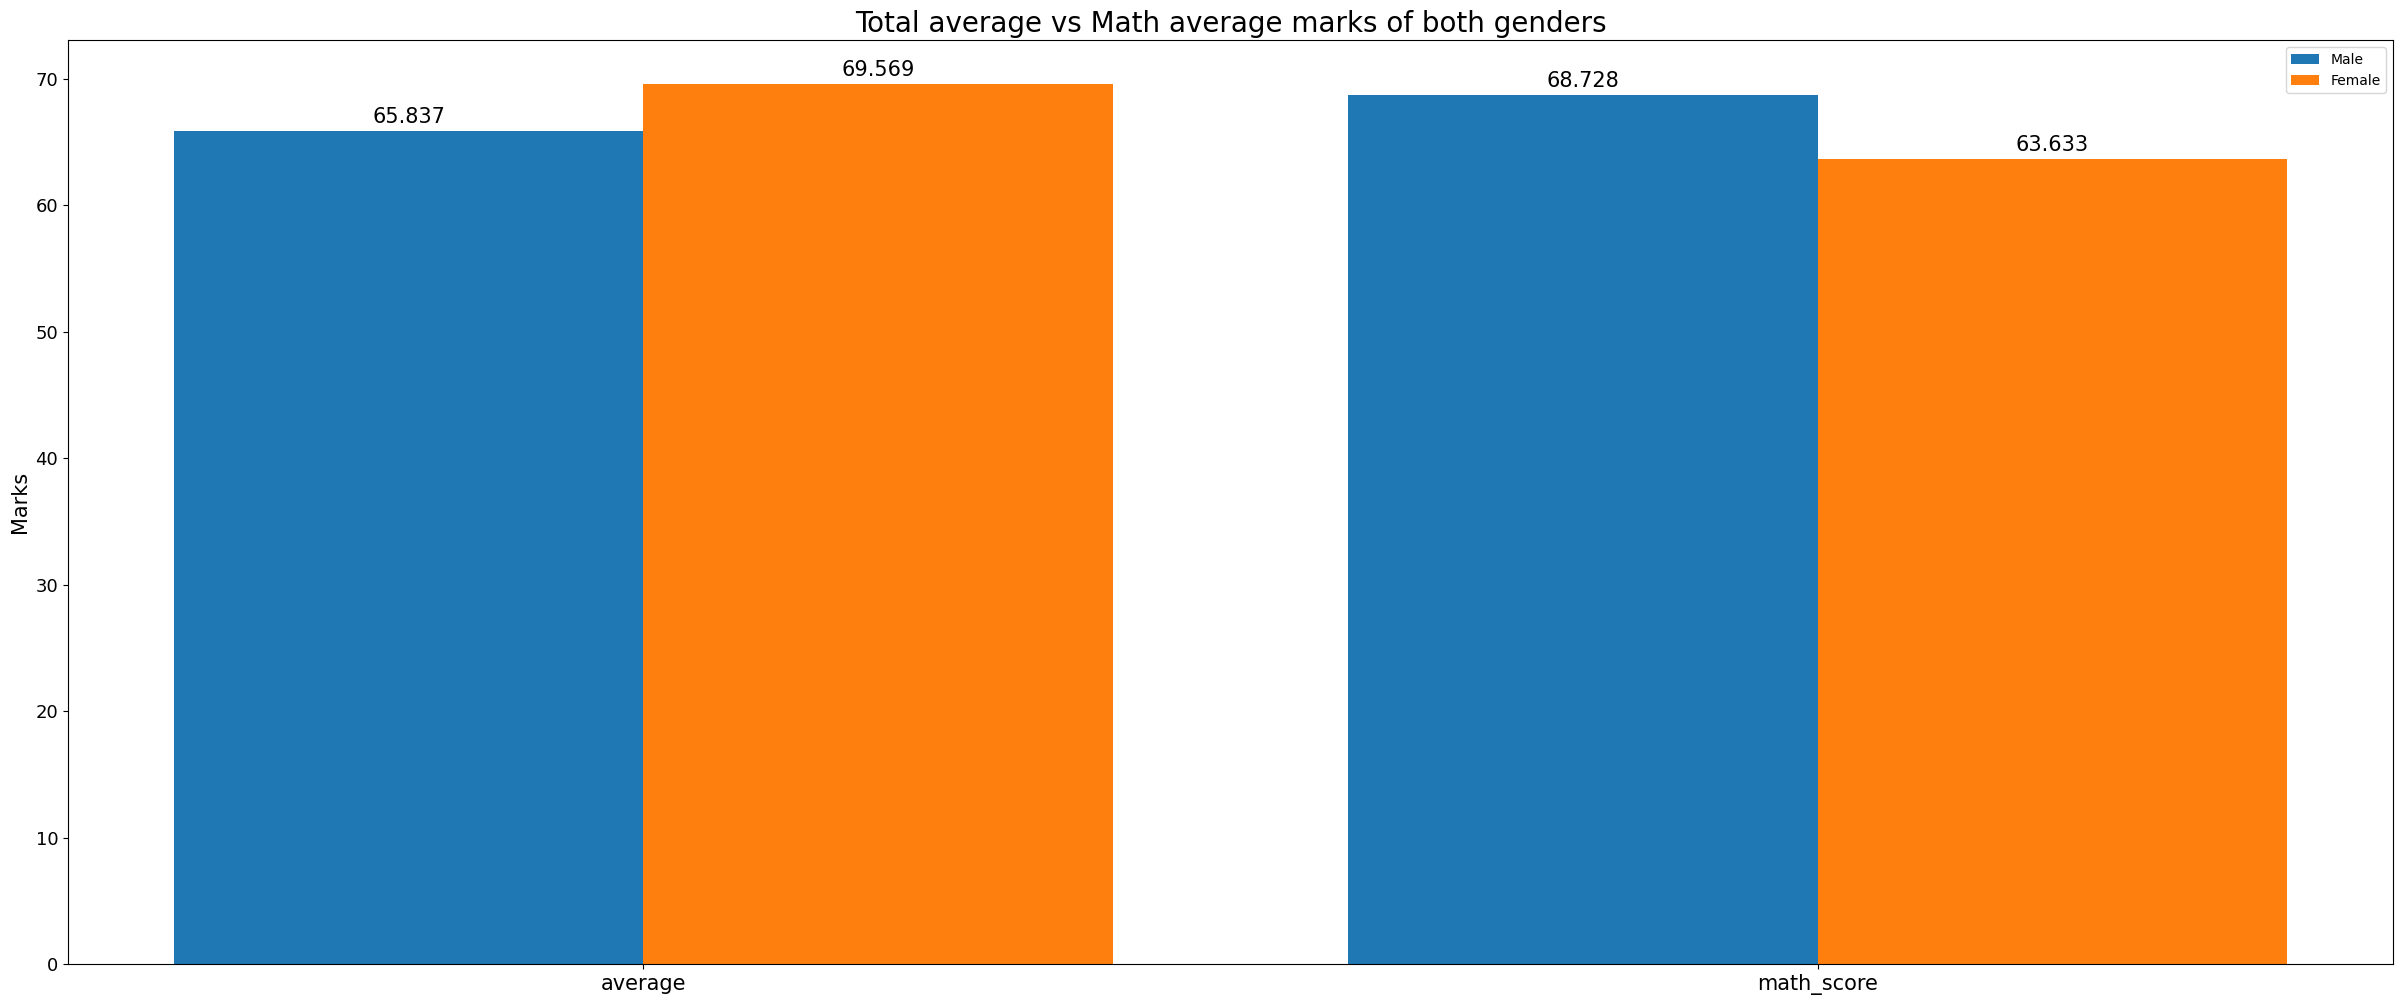

In [23]:
plt.figure(figsize=(10,8))
categories = ["average", 'math_score']

female_score = [gender_group.average[0], gender_group.math_score[0]]
male_score = [gender_group.average[1], gender_group.math_score[1]]

X_axis = np.arange(len(categories))

fig, ax = plt.subplots()

bar1 = ax.bar(X_axis - 0.2, male_score, 0.4, label='Male')
bar2 = ax.bar(X_axis + 0.2, female_score, 0.4, label="Female")
for bars in [bar1, bar2]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{:.{}f}'.format(height, 3),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=15)

plt.xticks(X_axis, categories, fontsize=15)
plt.ylabel("Marks", fontsize=15)
plt.yticks(fontsize=13)
plt.title("Total average vs Math average marks of both genders", fontsize=20)
plt.legend()
plt.show()


**Insights**
- On an average females have a better overall score than men.
- whereas males have scored higher in Maths.

#### RACE/EHNICITY COLUMN
- How is Group wise distribution ?
- Is Race/Ehnicity has any impact on student's performance ?

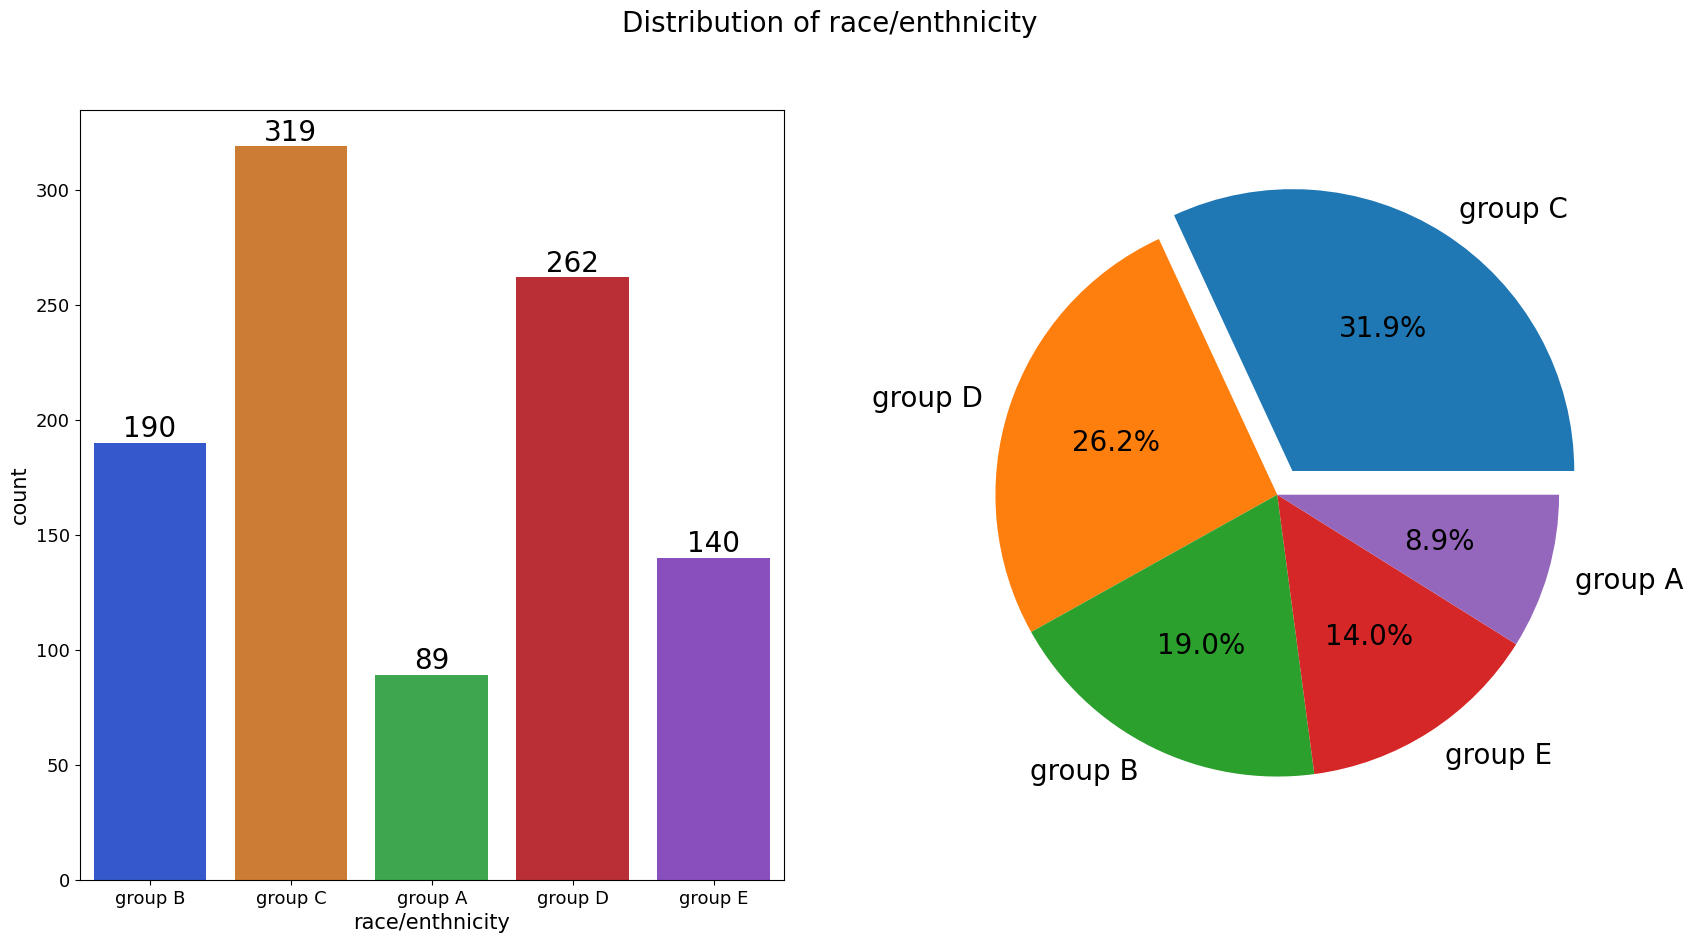

In [24]:
fig, ax = plt.subplots(1, 2, figsize=(20,10))
sns.countplot(data=df, x=df.race_ethnicity, palette='bright',ax=ax[0], saturation=0.6)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=20)
    ax[0].set_xlabel('race/enthnicity',fontsize=15)
    ax[0].set_ylabel('count',fontsize=15)
    ax[0].tick_params(axis='both', labelsize=13)
plt.pie(x=df.race_ethnicity.value_counts(), labels=df.race_ethnicity.value_counts().index, explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=False, textprops={'fontsize':20})
plt.suptitle('Distribution of race/enthnicity', fontsize=20)
plt.show()   

##### BIVARIATE ANALYSIS ( Is Race/Ehnicity has any impact on student's performance ? )

In [25]:
group_race = df.groupby('race_ethnicity')
math_marks =group_race['math_score'].mean()
writing_marks =group_race['writing_score'].mean()
reading_marks =group_race['reading_score'].mean()
reading_marks

race_ethnicity
group A    64.674157
group B    67.352632
group C    69.103448
group D    70.030534
group E    73.028571
Name: reading_score, dtype: float64

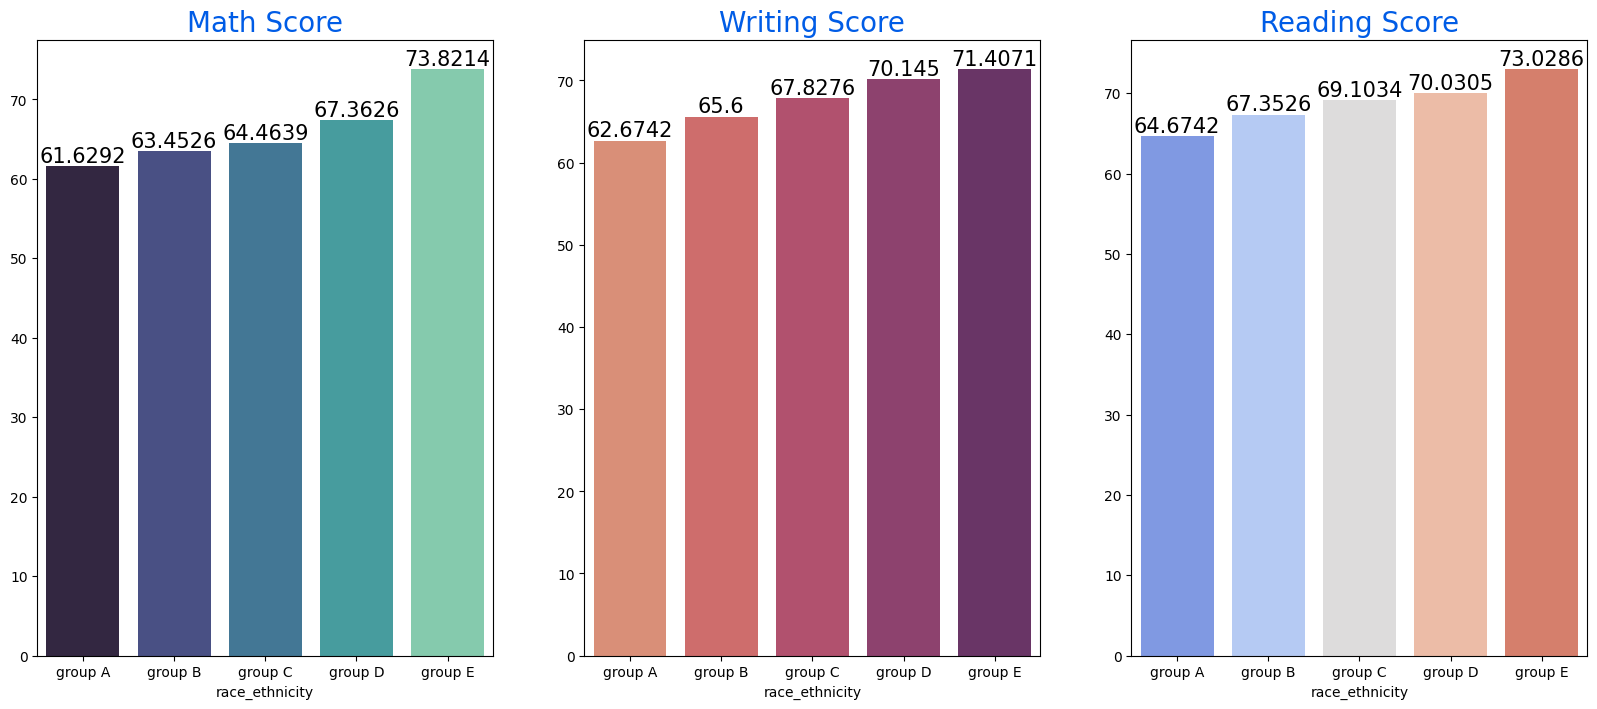

In [26]:
fig, (ax0,ax1,ax2) = plt.subplots(1,3,figsize=(20,8))
# Math Score
sns.barplot(x=math_marks.index, y=math_marks.values, palette='mako',ax=ax0)
ax0.set_title('Math Score', color = '#005CE6', size =20)

for container in ax0.containers:
    ax0.bar_label(container, color='black', size=15)
    
# Writing Score
sns.barplot(x=writing_marks.index, y=writing_marks.values, palette='flare',ax=ax1)
ax1.set_title('Writing Score', color = '#005CE6', size =20)

for container in ax1.containers:
    ax1.bar_label(container, color='black', size=15)

# Reading Score
sns.barplot(x=reading_marks.index, y=reading_marks.values, palette='coolwarm',ax=ax2)
ax2.set_title('Reading Score', color = '#005CE6', size =20)

for container in ax2.containers:
    ax2.bar_label(container, color='black', size=15)
    
plt.show()

**Insights**
- Group E students have scored the highest marks.
- Group A students have scored the lowest marks.
- Students from a lower Socioeconomic status have a lower avg in all course subjects